# COVID-19 Analysis with New York City Data

This is my first data science project. I am still learning. Constructive comments are highly appreciated. Please share what else can be done with this data set. Thank you.

New York has the highest number of confirmed cases of any state in the United States, with three times as many cases as California (the state with the third-most cases) and five times that of neighboring Pennsylvania (which has the sixth-most). So analysing NY data can give more insights.

Importing necessary packages

In [1]:
import numpy as np 
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from matplotlib import pyplot
import matplotlib.cm as cm
import matplotlib.colors as colors


Importing dataset in IBM Watson Studio. This data set is collected from Kaggle. 'confirmed-covid-19-cases-in-us-by-state-and-county.csv'

In [2]:
# The code was removed by Watson Studio for sharing.

,county_fips,county_name,state_name,state_fips,date,confirmed,lat,long,geometry
0,0,Statewide Unallocated,AL,1,2020-01-22,0,NaN,NaN,NaN
1,0,Statewide Unallocated,AL,1,2020-01-23,0,NaN,NaN,NaN
2,0,Statewide Unallocated,AL,1,2020-01-24,0,NaN,NaN,NaN
3,0,Statewide Unallocated,AL,1,2020-01-25,0,NaN,NaN,NaN
4,0,Statewide Unallocated,AL,1,2020-01-26,0,NaN,NaN,NaN
5,0,Statewide Unallocated,AL,1,2020-01-27,0,NaN,NaN,NaN
6,0,Statewide Unallocated,AL,1,2020-01-28,0,NaN,NaN,NaN
7,0,Statewide Unallocated,AL,1,2020-01-29,0,NaN,NaN,NaN
8,0,Statewide Unallocated,AL,1,2020-01-30,0,NaN,NaN,NaN
9,0,Statewide Unallocated,AL,1,2020-01-31,0,NaN,NaN,NaN


Separating New York Data from data set and cleaning

In [3]:
us_data_ny=us_data[us_data['state_name']=='NY']
us_data_ny.drop(us_data_ny[us_data_ny.county_name=='Statewide Unallocated'].index, inplace=True)
us_data_ny.drop(us_data_ny[us_data_ny.county_name=='New York City Unallocated/Probable'].index, inplace=True)
columns=['state_fips','lat','long','geometry','county_fips']
us_data_ny.drop(columns, inplace=True, axis=1)
us_data_ny['date']=pd.to_datetime(us_data_ny['date'], format='%Y-%m-%d')
us_data_ny.set_index('date',inplace=True)
us_data_ny.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,county_name,state_name,confirmed
date,,,
2020-01-22,Albany County,NY,0
2020-01-23,Albany County,NY,0
2020-01-24,Albany County,NY,0
2020-01-25,Albany County,NY,0
2020-01-26,Albany County,NY,0


Separating New York Data into some big counties

In [4]:
us_data_ny_albany=us_data_ny[us_data_ny['county_name']=='Albany County']
us_data_ny_allegany=us_data_ny[us_data_ny['county_name']=='Allegany County']
us_data_ny_bronx=us_data_ny[us_data_ny['county_name']=='Bronx County']
us_data_ny_cattaraugugus=us_data_ny[us_data_ny['county_name']=='Cattaraugus County']
us_data_ny_ontario=us_data_ny[us_data_ny['county_name']=='Ontario County']
us_data_ny_queens=us_data_ny[us_data_ny['county_name']=='Queens County']
us_data_ny_rockland=us_data_ny[us_data_ny['county_name']=='Rockland County']
us_data_ny_west=us_data_ny[us_data_ny['county_name']=='Westchester County']

# Ploting

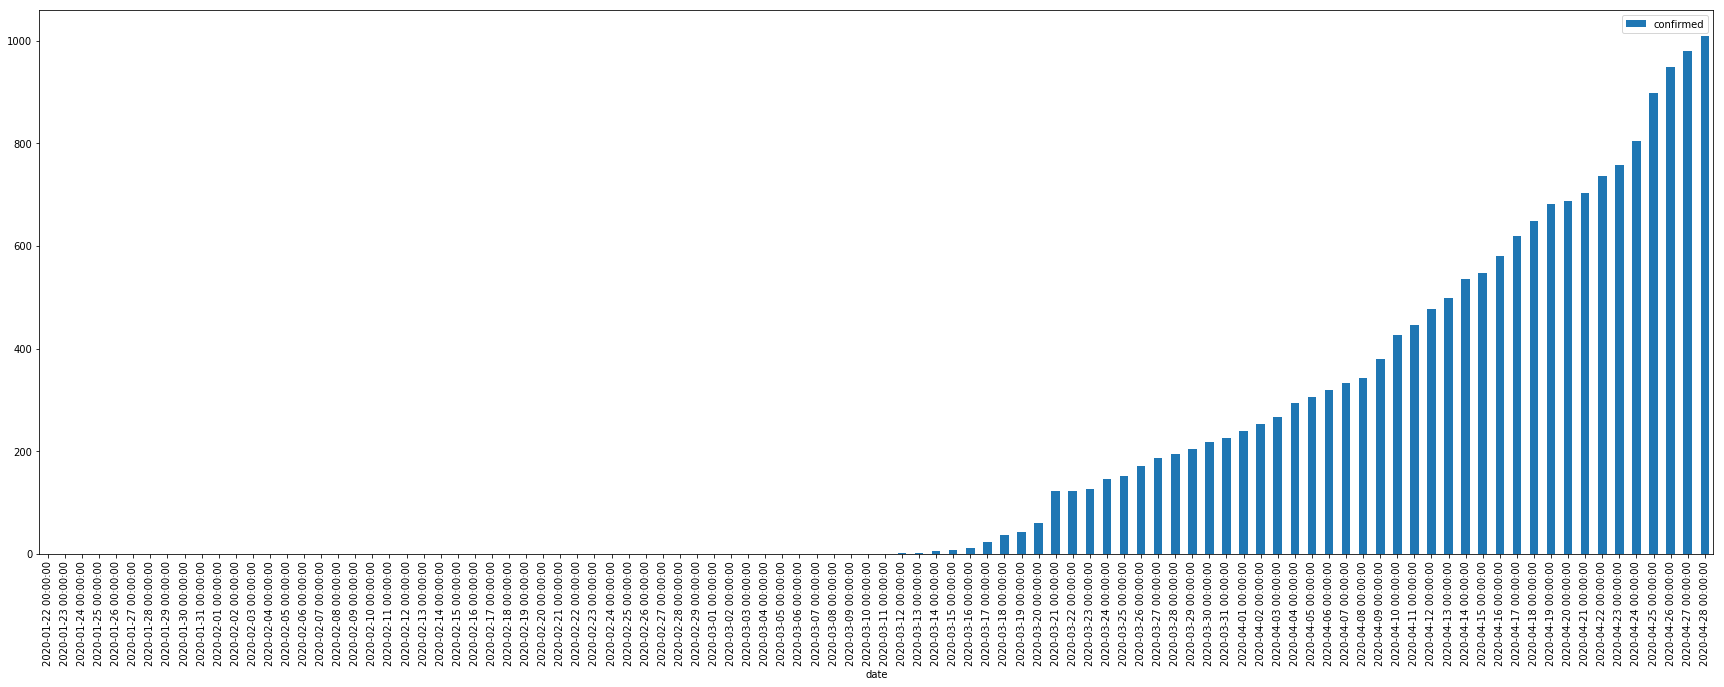

In [5]:
us_data_ny_albany.plot.bar(figsize=(30,10))

pyplot.show()


March 15 -Lockdown Ny March 7

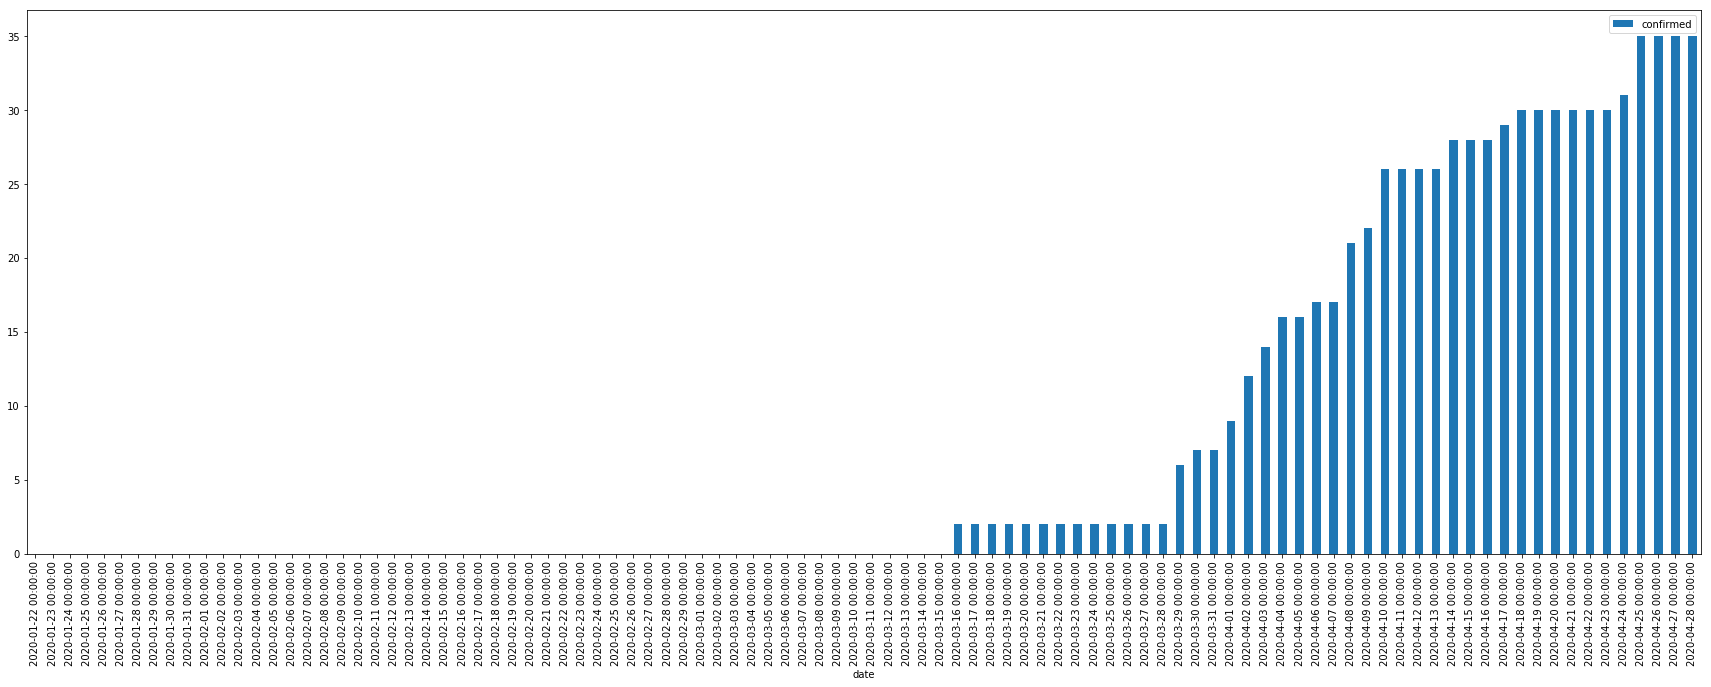

In [7]:
us_data_ny_allegany.plot.bar(figsize=(30,10))

pyplot.show()

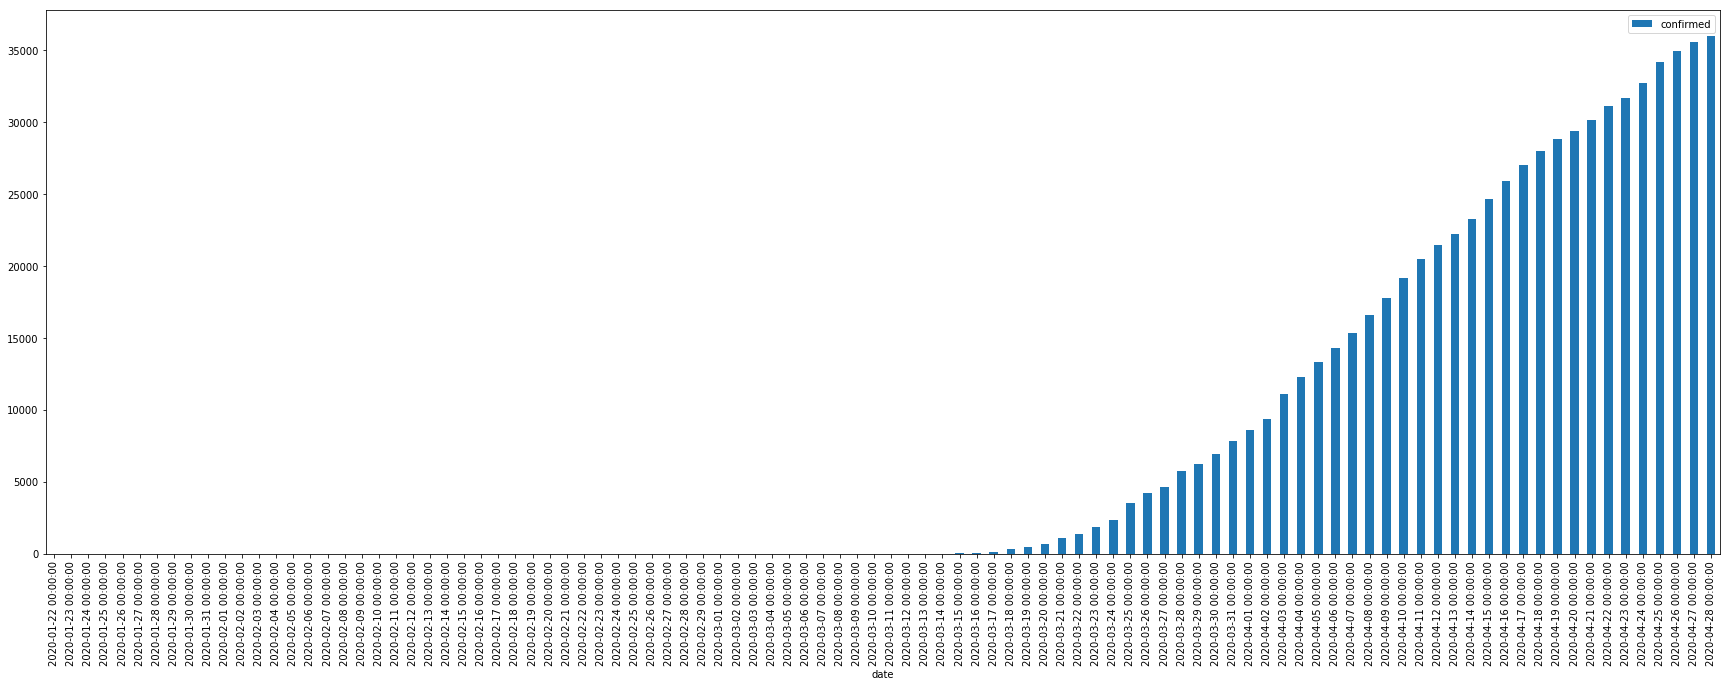

In [6]:
us_data_ny_bronx.plot.bar(figsize=(30,10))

pyplot.show()

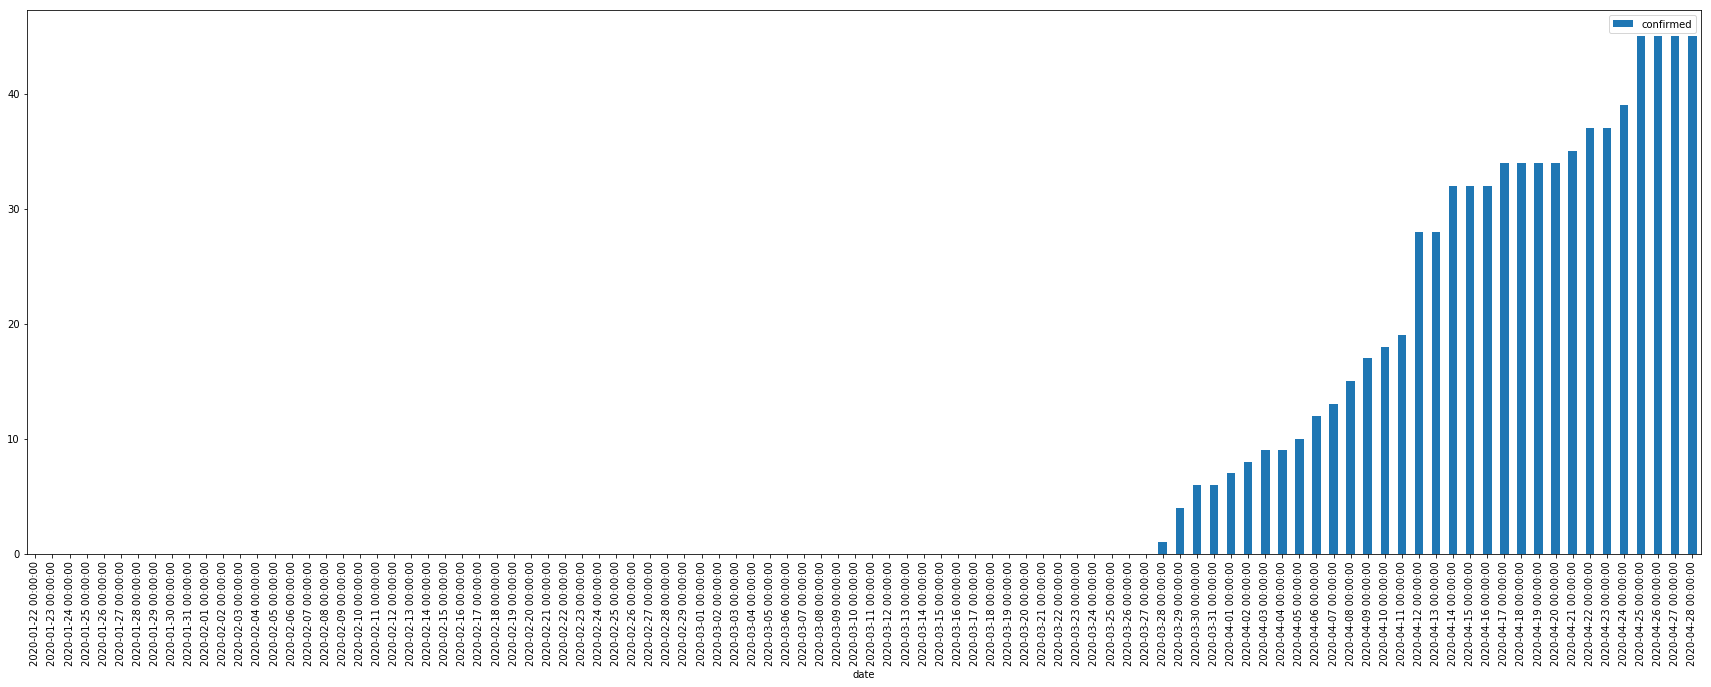

In [9]:
us_data_ny_cattaraugugus.plot.bar(figsize=(30,10))

pyplot.show()

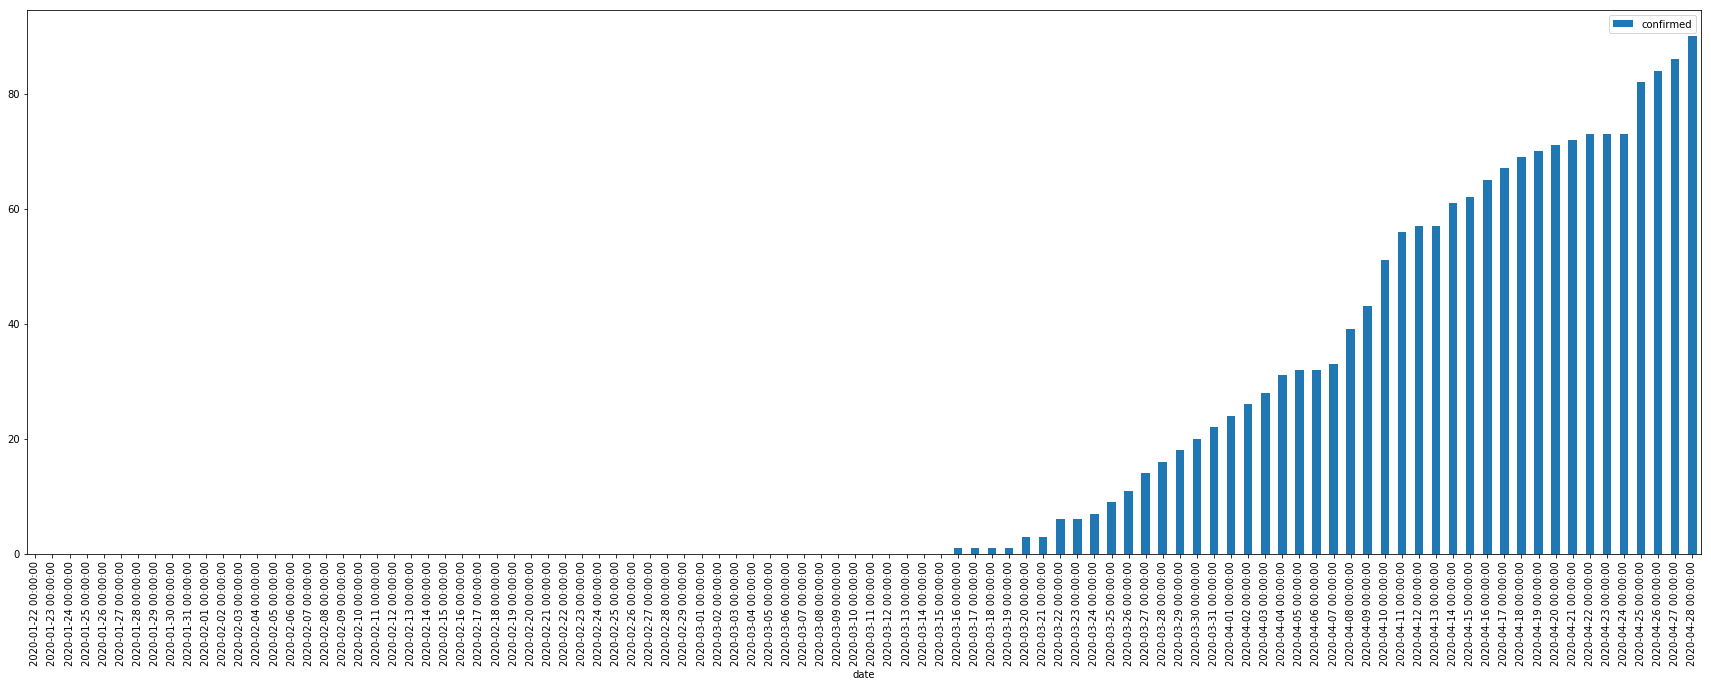

In [7]:
us_data_ny_ontario.plot.bar(figsize=(30,10))

pyplot.show()

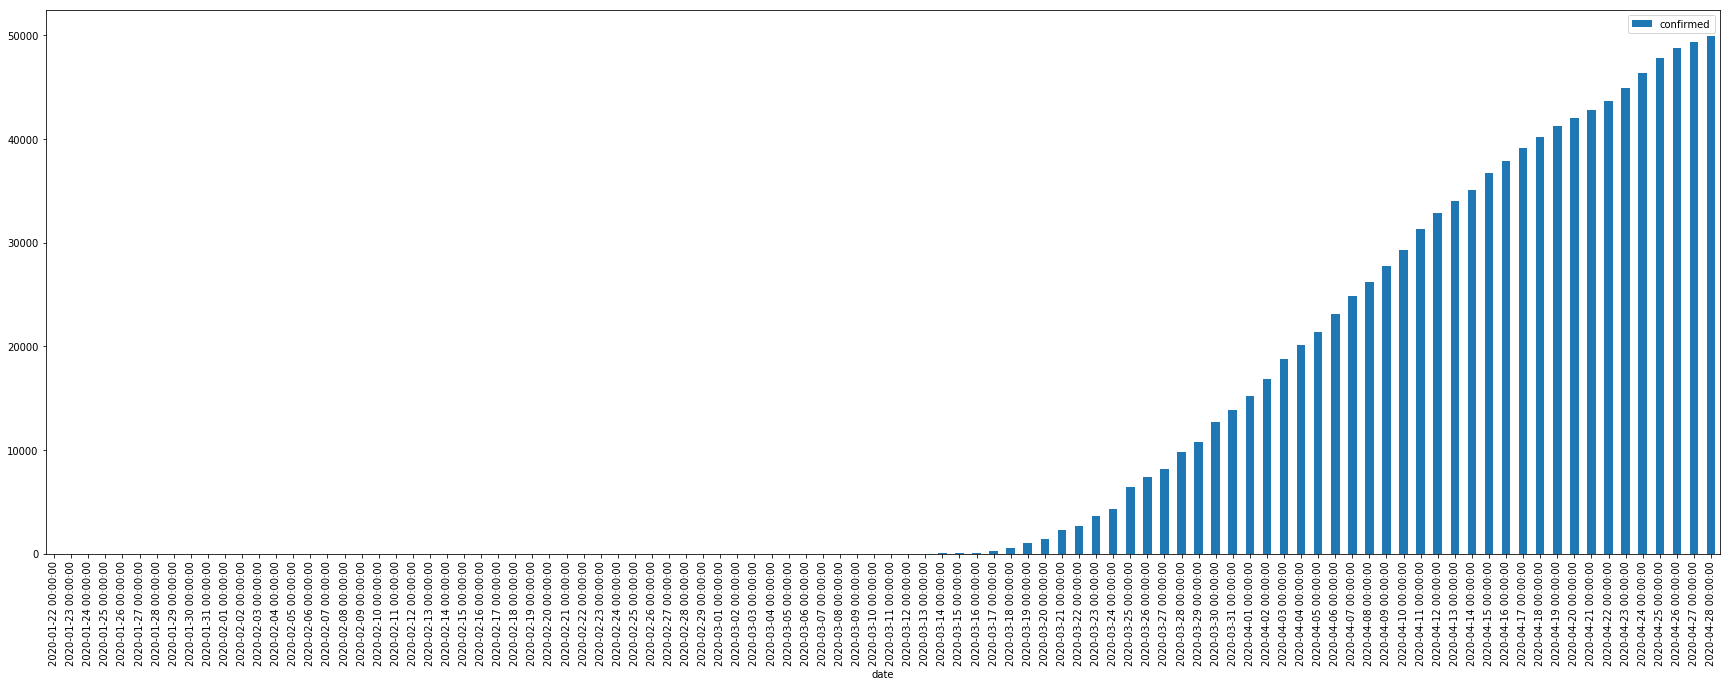

In [11]:
us_data_ny_queens.plot.bar(figsize=(30,10))

pyplot.show()

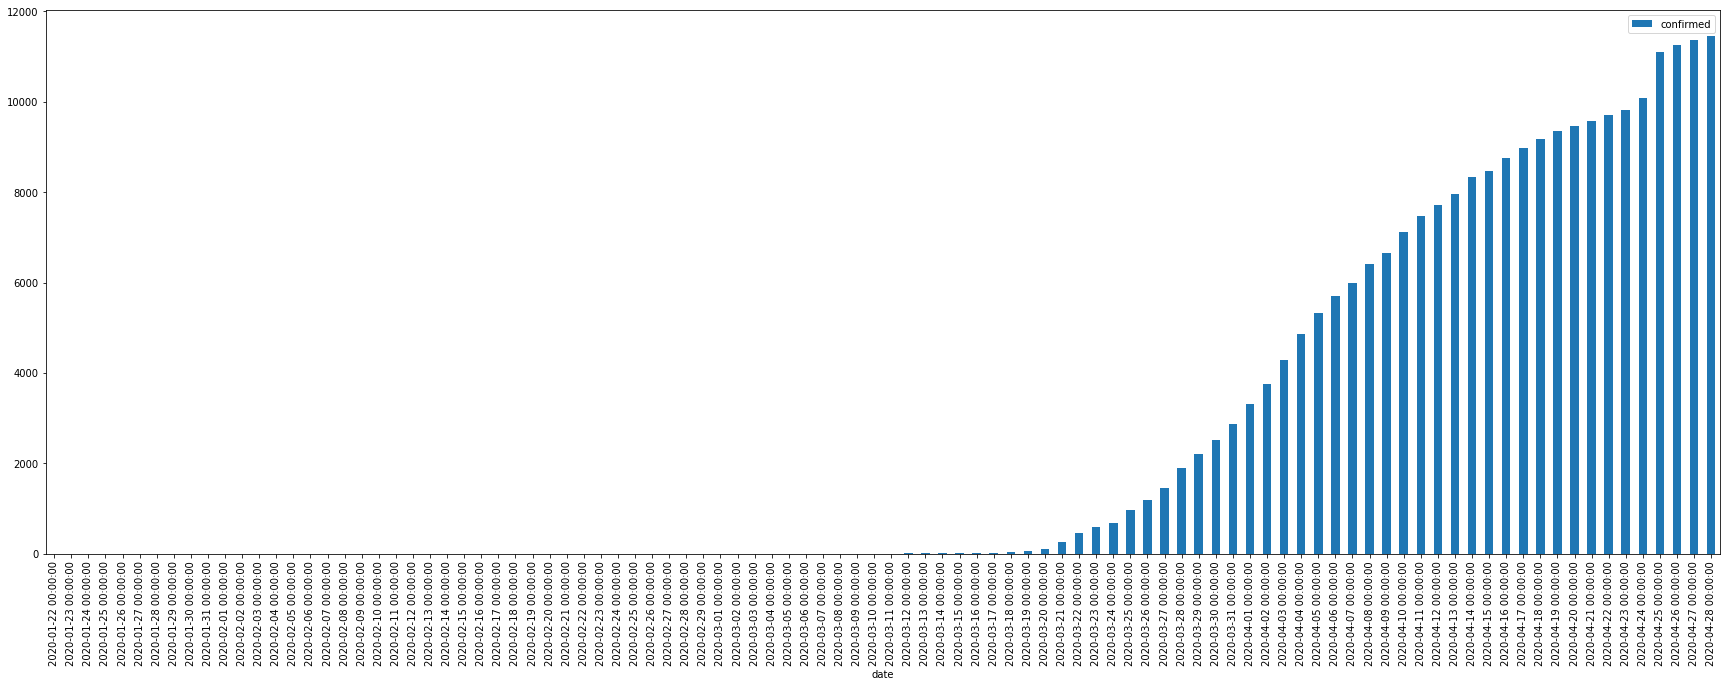

In [8]:
us_data_ny_rockland.plot.bar(figsize=(30,10))

pyplot.show()

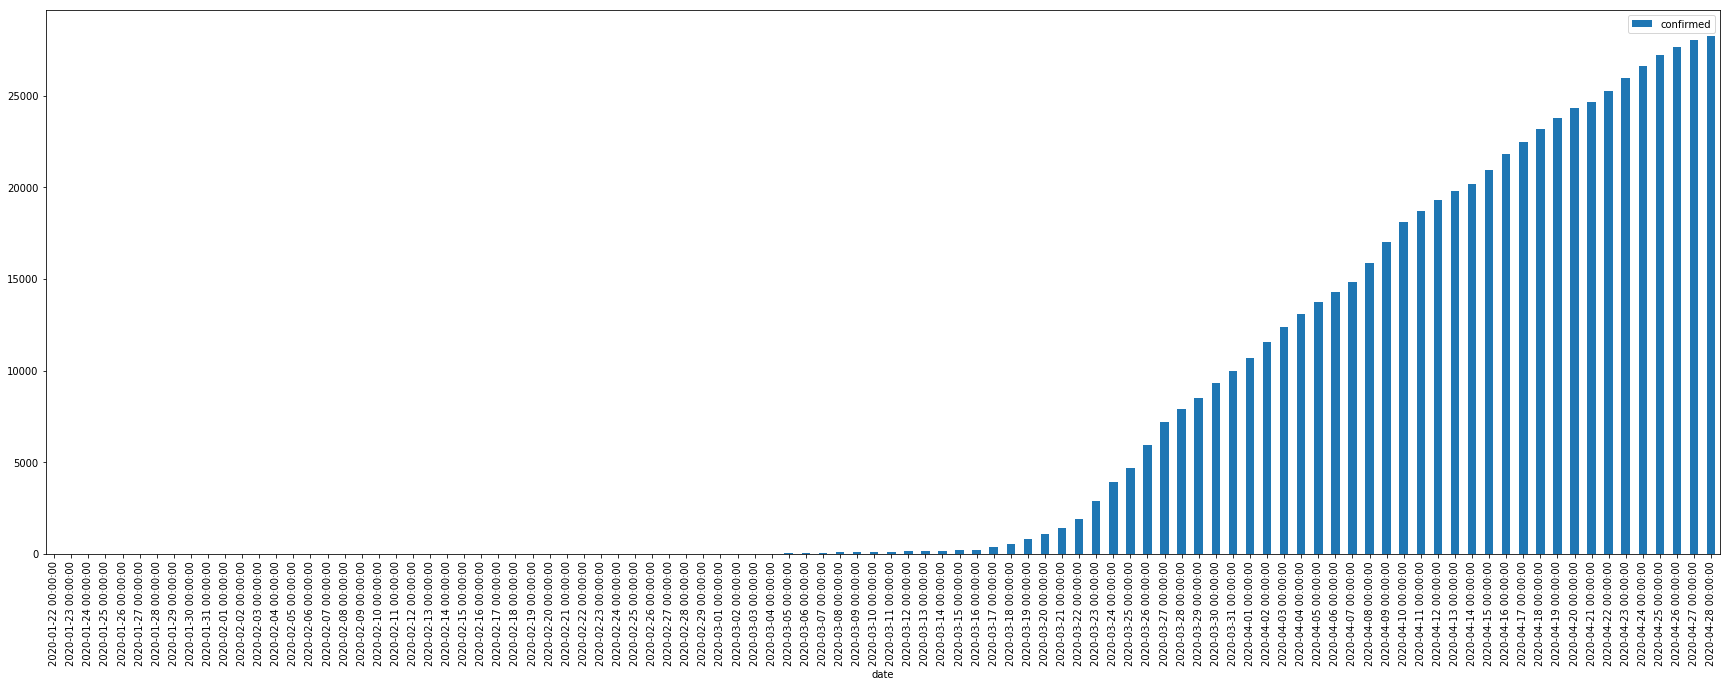

In [9]:
us_data_ny_west.plot.bar(figsize=(30,10))

pyplot.show()

We can't get the actual scenario by ploting this way. Rather we need to plot the ratio of new cases. It will give some insights about number of patient infected by one single patient.

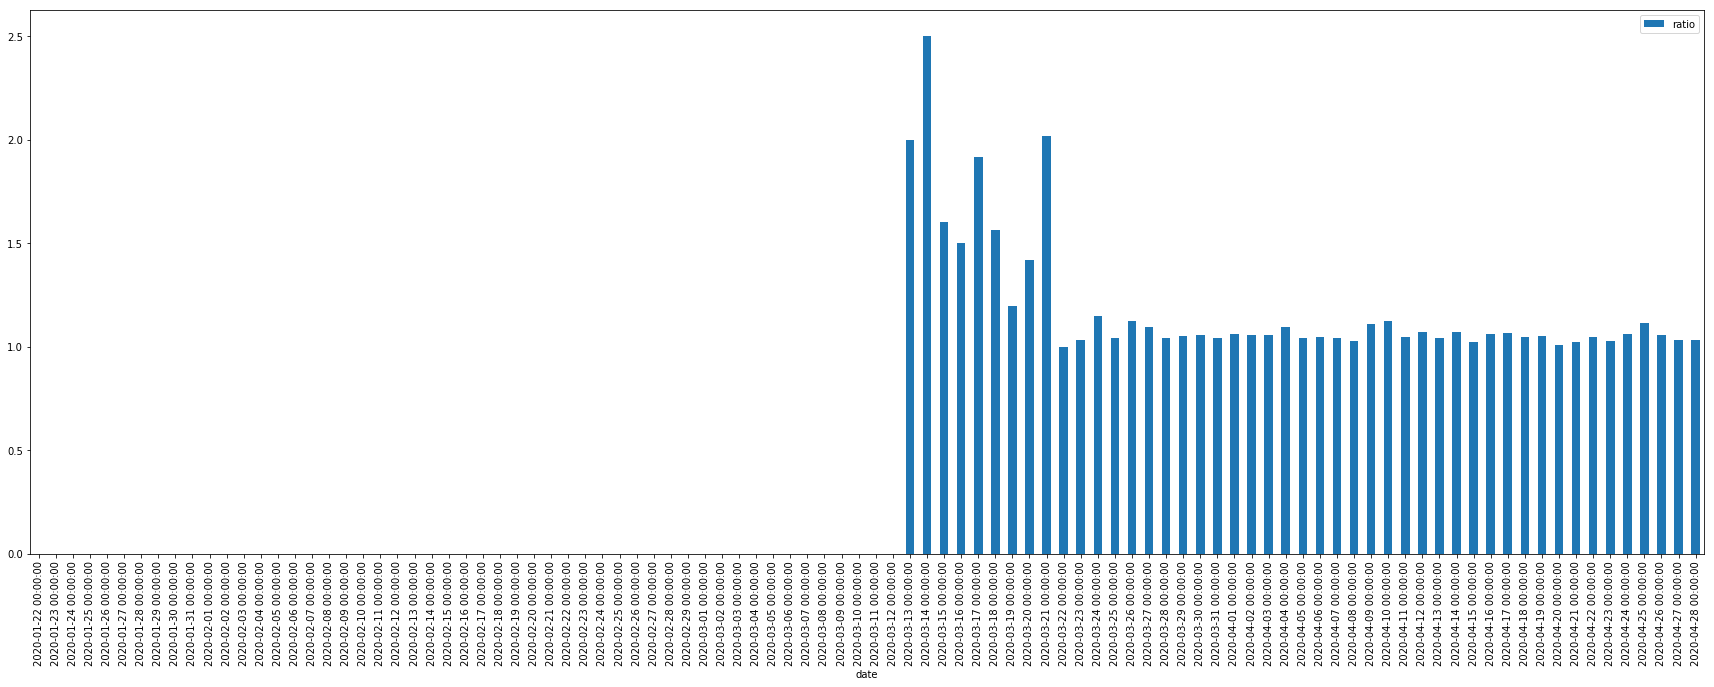

In [112]:
scaler=us_data_ny_albany['confirmed']
scaler=scaler.shift(1,axis=0)
scaler=pd.DataFrame(scaler)
scaler=scaler.reset_index()
albany_n=us_data_ny_albany
albany_n=albany_n.reset_index()
albany_n['ratio']=albany_n['confirmed']/scaler['confirmed']
columns=['county_name','state_name','confirmed']
albany_n.drop(columns, inplace=True, axis=1)
albany_n.set_index('date',inplace=True)
albany_n['ratio']=albany_n['ratio'].fillna(0)
albany_n.plot.bar(figsize=(30,10))
pyplot.show()

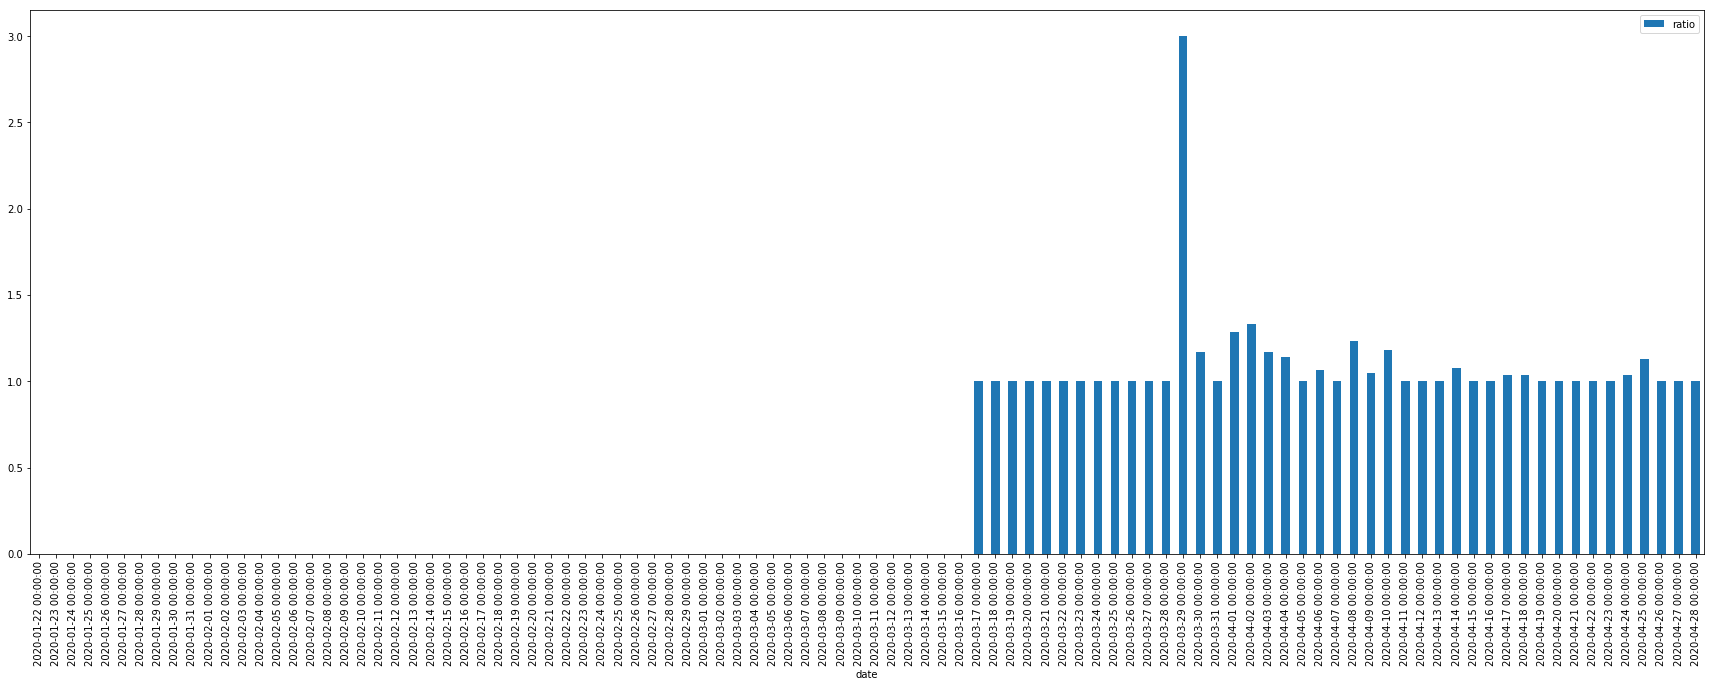

In [109]:
scaler=us_data_ny_allegany['confirmed']
scaler=scaler.shift(1,axis=0)
scaler=pd.DataFrame(scaler)
scaler=scaler.reset_index()
allegany_n=us_data_ny_allegany
allegany_n=allegany_n.reset_index()
allegany_n['ratio']=allegany_n['confirmed']/scaler['confirmed']
columns=['county_name','state_name','confirmed']
allegany_n.drop(columns, inplace=True, axis=1)
allegany_n.set_index('date',inplace=True)
allegany_n['ratio']=allegany_n['ratio'].fillna(0)
allegany_n.plot.bar(figsize=(30,10))
pyplot.show()

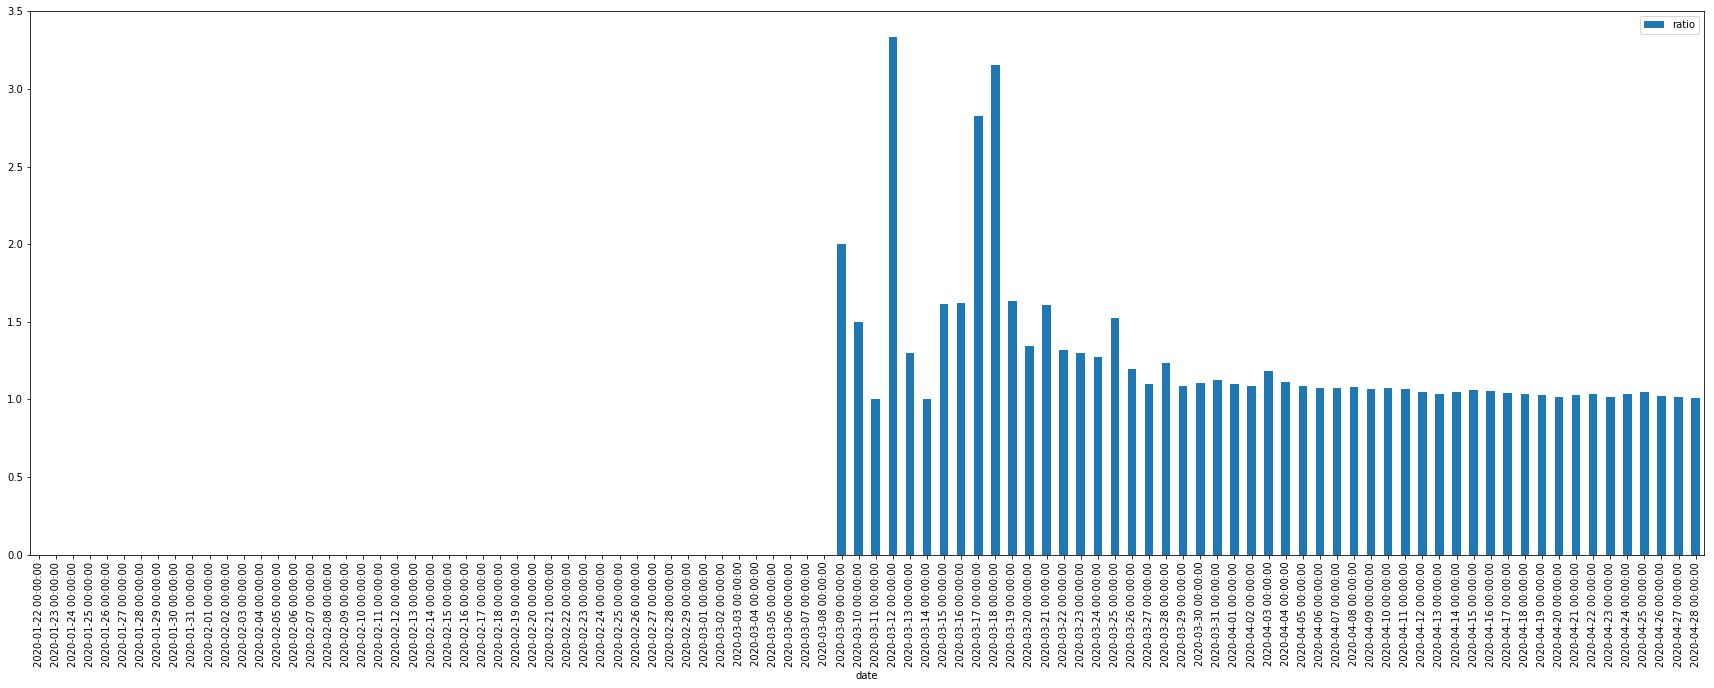

In [110]:
scaler=us_data_ny_bronx['confirmed']
scaler=scaler.shift(1,axis=0)
scaler=pd.DataFrame(scaler)
scaler=scaler.reset_index()
bronx_n=us_data_ny_bronx
bronx_n=bronx_n.reset_index()
bronx_n['ratio']=bronx_n['confirmed']/scaler['confirmed']
columns=['county_name','state_name','confirmed']
bronx_n.drop(columns, inplace=True, axis=1)
bronx_n.set_index('date',inplace=True)
bronx_n['ratio']=bronx_n['ratio'].fillna(0)
bronx_n.plot.bar(figsize=(30,10))
pyplot.show()

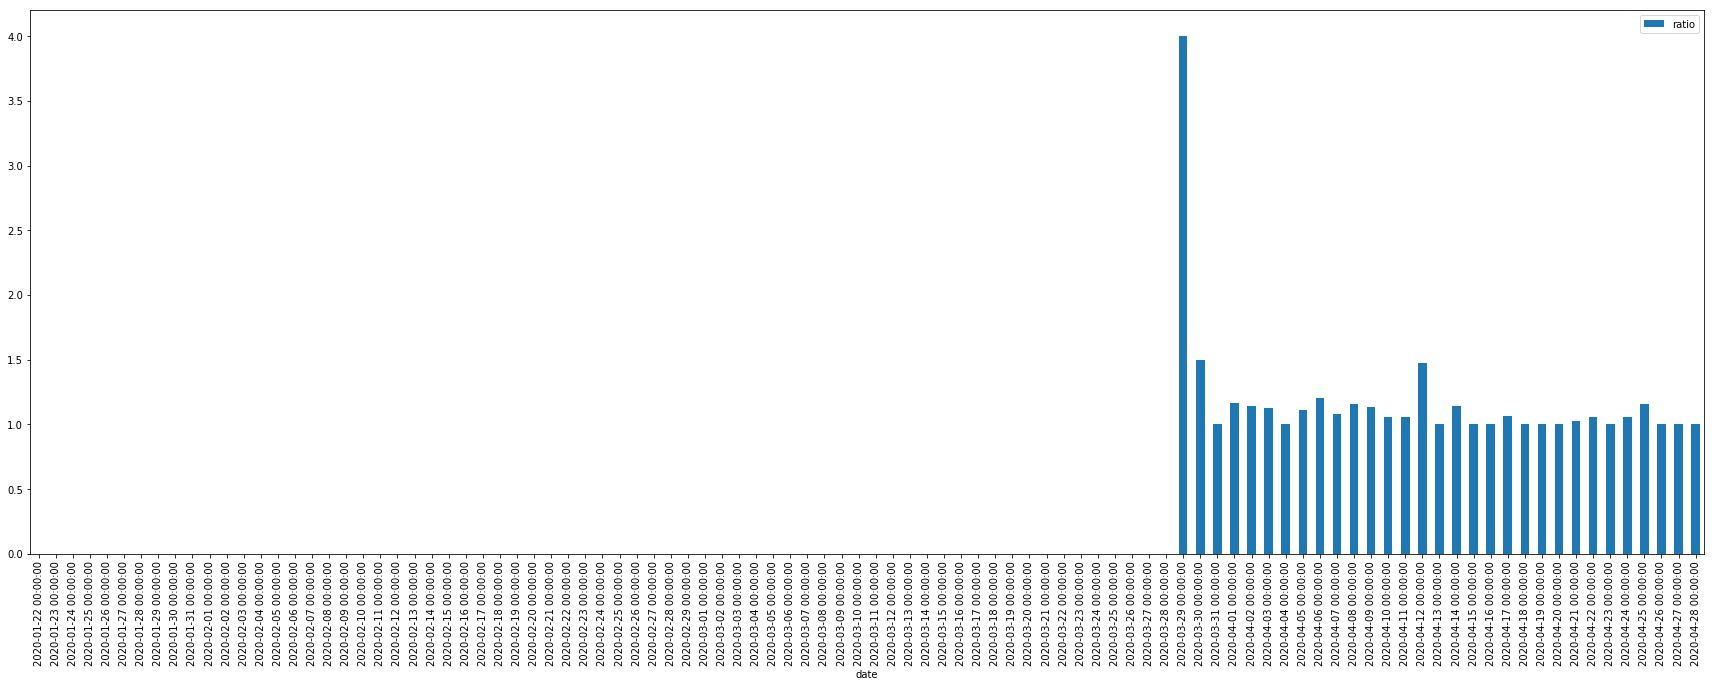

In [10]:
scaler=us_data_ny_cattaraugugus['confirmed']
scaler=scaler.shift(1,axis=0)
scaler=pd.DataFrame(scaler)
scaler=scaler.reset_index()
cattaraugugus_n=us_data_ny_cattaraugugus
cattaraugugus_n=cattaraugugus_n.reset_index()
cattaraugugus_n['ratio']=cattaraugugus_n['confirmed']/scaler['confirmed']
columns=['county_name','state_name','confirmed']
cattaraugugus_n.drop(columns, inplace=True, axis=1)
cattaraugugus_n.set_index('date',inplace=True)
cattaraugugus_n['ratio']=cattaraugugus_n['ratio'].fillna(0)
cattaraugugus_n.plot.bar(figsize=(30,10))
pyplot.show()

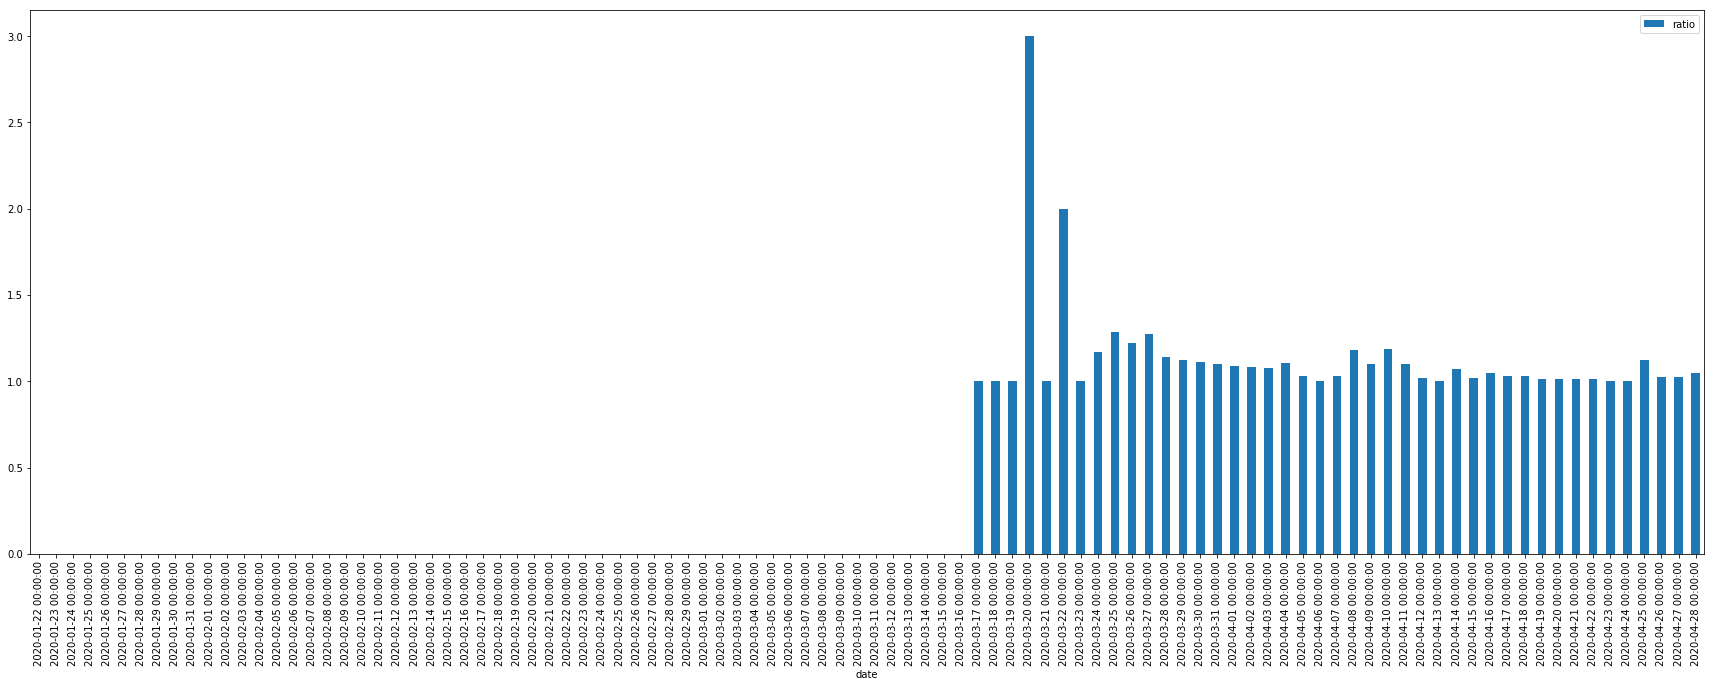

In [13]:
scaler=us_data_ny_ontario['confirmed']
scaler=scaler.shift(1,axis=0)
scaler=pd.DataFrame(scaler)
scaler=scaler.reset_index()
ontario_n=us_data_ny_ontario
ontario_n=ontario_n.reset_index()
ontario_n['ratio']=ontario_n['confirmed']/scaler['confirmed']
columns=['county_name','state_name','confirmed']
ontario_n.drop(columns, inplace=True, axis=1)
ontario_n.set_index('date',inplace=True)
ontario_n['ratio']=ontario_n['ratio'].fillna(0)
ontario_n.plot.bar(figsize=(30,10))
pyplot.show()

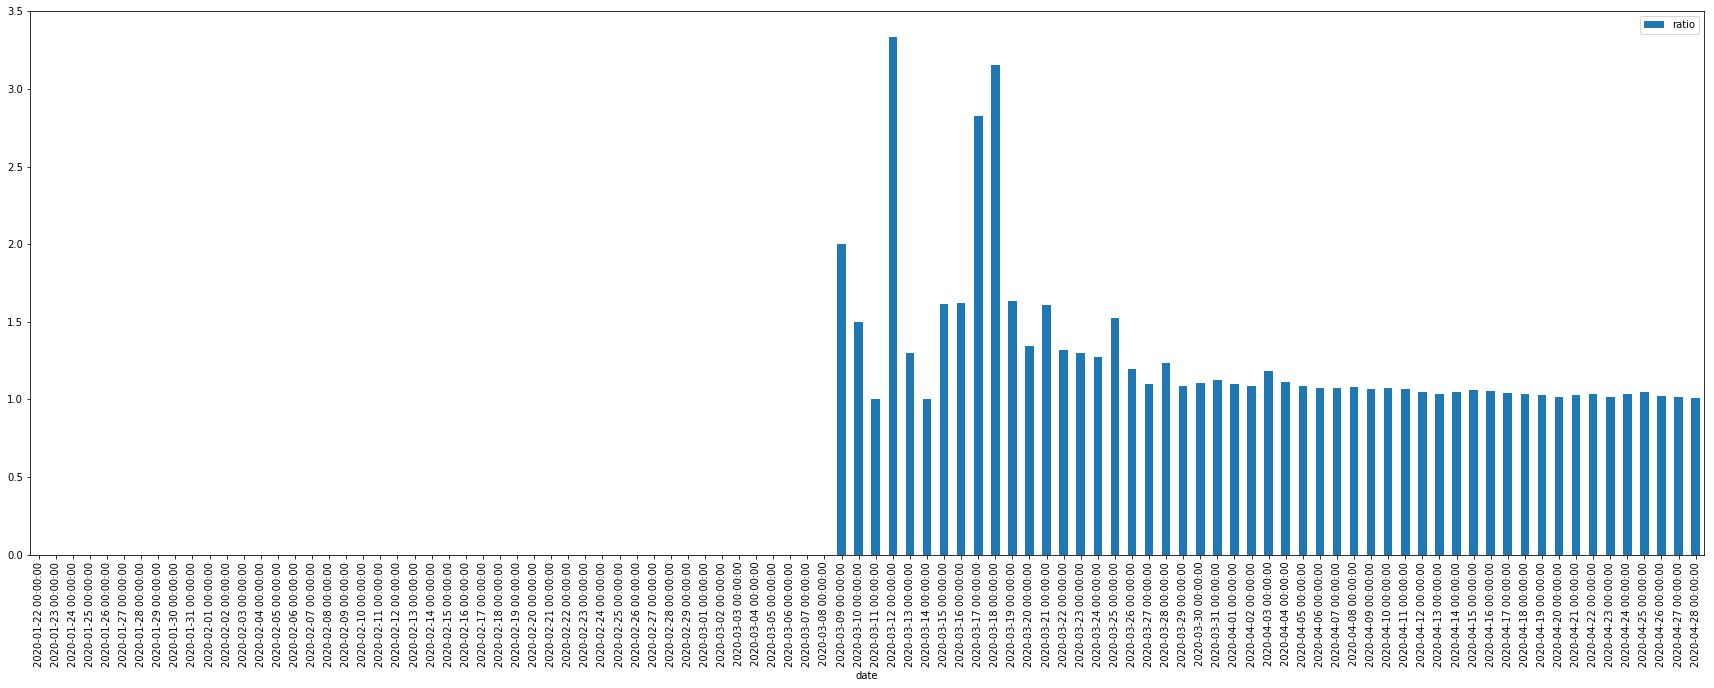

In [103]:
scaler=us_data_ny_ontario['confirmed']
scaler=scaler.shift(1,axis=0)
scaler=pd.DataFrame(scaler)
scaler=scaler.reset_index()
ontario_n=us_data_ny_ontario
ontario_n=ontario_n.reset_index()
ontario_n['ratio']=ontario_n['confirmed']/scaler['confirmed']
columns=['county_name','state_name','confirmed']
ontario_n.drop(columns, inplace=True, axis=1)
ontario_n.set_index('date',inplace=True)
ontario_n['ratio']=ontario_n['ratio'].fillna(0)
ontario_n.plot.bar(figsize=(30,10))
pyplot.show()

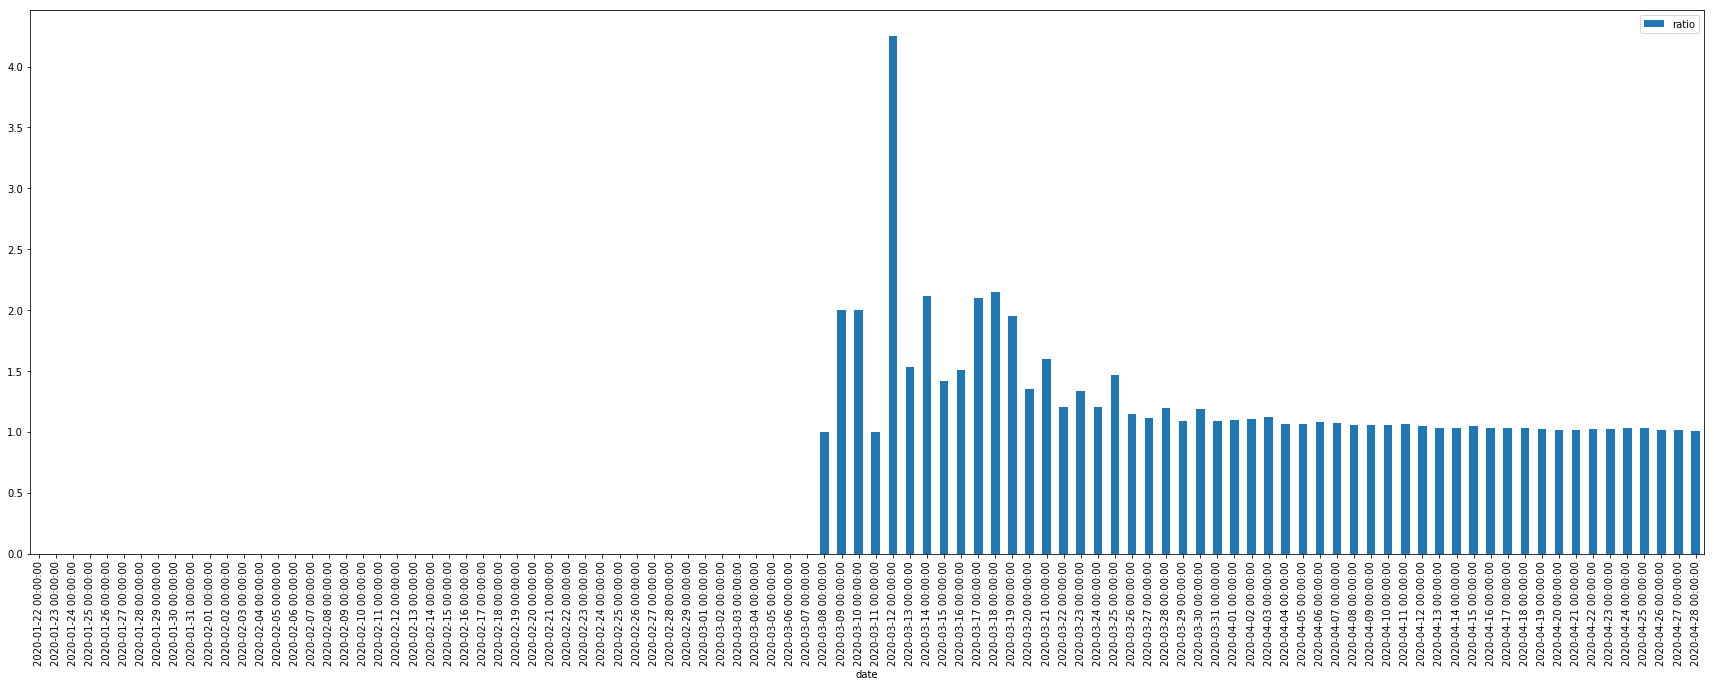

In [14]:
scaler=us_data_ny_queens['confirmed']
scaler=scaler.shift(1,axis=0)
scaler=pd.DataFrame(scaler)
scaler=scaler.reset_index()
queens_n=us_data_ny_queens
queens_n=queens_n.reset_index()
queens_n['ratio']=queens_n['confirmed']/scaler['confirmed']
columns=['county_name','state_name','confirmed']
queens_n.drop(columns, inplace=True, axis=1)
queens_n.set_index('date',inplace=True)
queens_n['ratio']=queens_n['ratio'].fillna(0)
queens_n.plot.bar(figsize=(30,10))
pyplot.show()

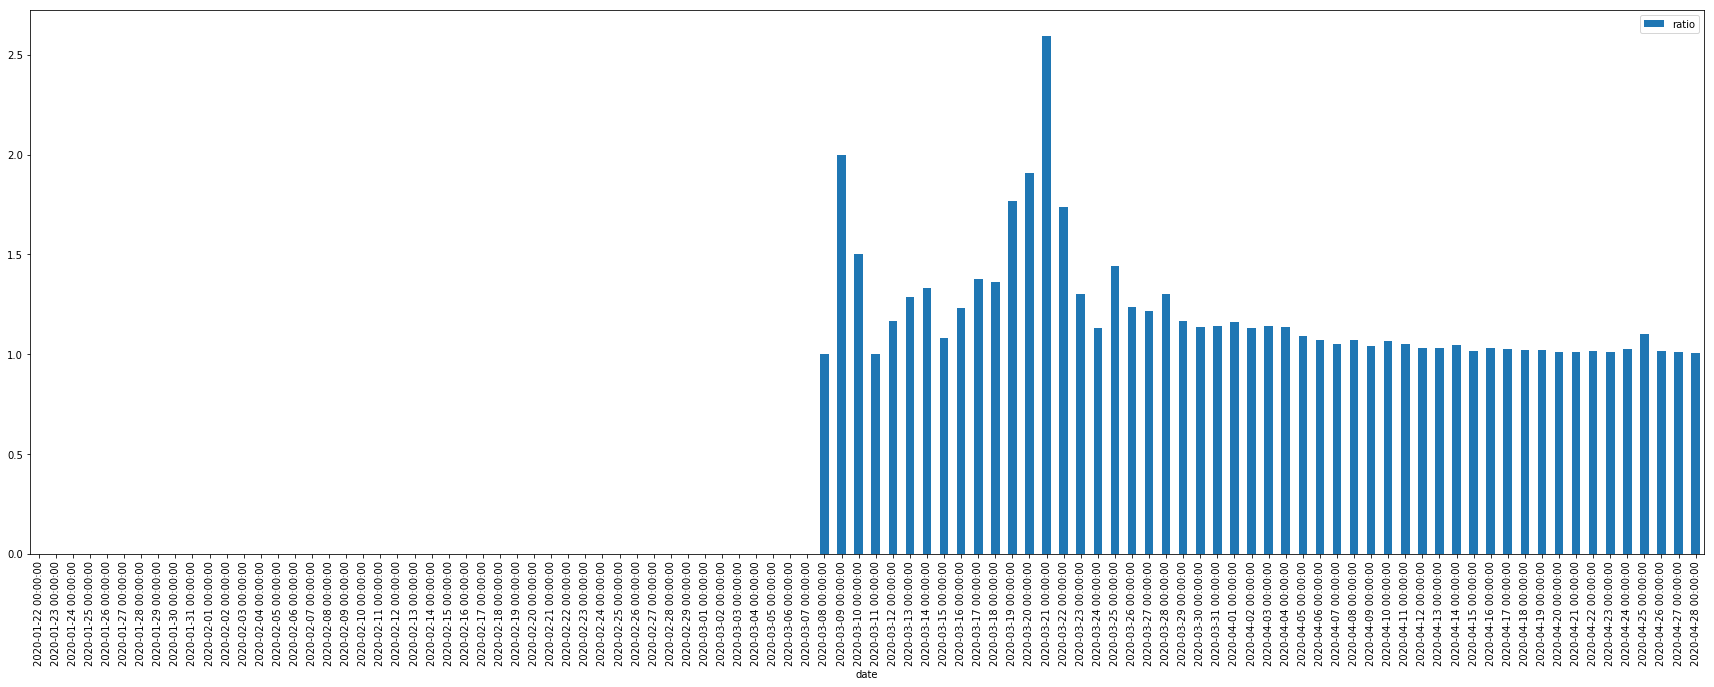

In [15]:
scaler=us_data_ny_rockland['confirmed']
scaler=scaler.shift(1,axis=0)
scaler=pd.DataFrame(scaler)
scaler=scaler.reset_index()
rockland_n=us_data_ny_rockland
rockland_n=rockland_n.reset_index()
rockland_n['ratio']=rockland_n['confirmed']/scaler['confirmed']
columns=['county_name','state_name','confirmed']
rockland_n.drop(columns, inplace=True, axis=1)
rockland_n.set_index('date',inplace=True)
rockland_n['ratio']=rockland_n['ratio'].fillna(0)
rockland_n.plot.bar(figsize=(30,10))
pyplot.show()

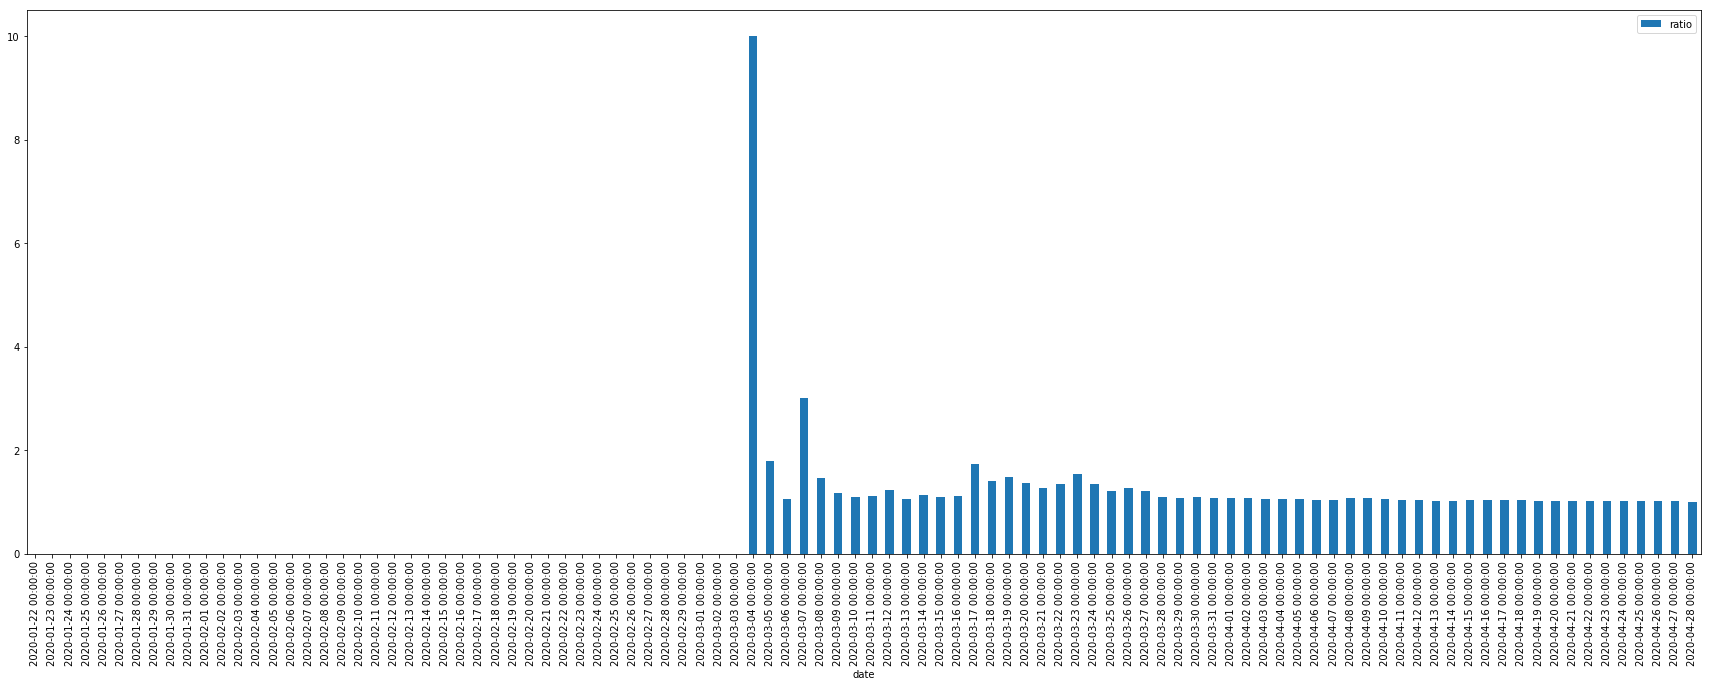

In [16]:
scaler=us_data_ny_west['confirmed']
scaler=scaler.shift(1,axis=0)
scaler=pd.DataFrame(scaler)
scaler=scaler.reset_index()
west_n=us_data_ny_west
west_n=west_n.reset_index()
west_n['ratio']=west_n['confirmed']/scaler['confirmed']
columns=['county_name','state_name','confirmed']
west_n.drop(columns, inplace=True, axis=1)
west_n.set_index('date',inplace=True)
west_n['ratio']=west_n['ratio'].fillna(0)
west_n.plot.bar(figsize=(30,10))
pyplot.show()

From above plotting we have seen that  social interventions (including social distancing requirements, masks, school and business closures, opening of testing clinics, contact tracing, availability of serological testing, etc.) have decreased the number of patient infected through one patient. 

I am new in data science. This is my first project. Please share some constructive comments.